# Lab 5 | EDA & Visualisation.

In [16]:
# Task A

import pandas as pd
df = pd.read_csv("../data/students.csv")
df.head()

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior


In [17]:
# Task B
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64

The GPA column has the most missing values. This may be because some first year students may not have finished any classes yet, so they wouldn't have a GPA. 

In [18]:
# Task C

data = {'Statistic': ['GPA', 'Age'], 'count': [df['gpa'].count(), df['age'].count()], 
        'mean': [df['gpa'].mean(), df['age'].mean()], 'median': [df['gpa'].median(), df['age'].median()], 
        'variance': [df['gpa'].var(), df['gpa'].var()], 'SD': [df['gpa'].std(), df['age'].std()], 
        'min': [df['gpa'].min(), df['age'].min()], 'max': [df['gpa'].max(), df['age'].max()]}

summary = pd.DataFrame(data)
summary.head()

,Statistic,count,mean,median,variance,SD,min,max
0,GPA,90,2.624667,2.665,0.227432,0.476898,1.63,3.93
1,Age,100,16.130000,16.000,0.227432,1.375507,14.00,18.00


Text(0.5, 1.0, 'Distribution of GPA Among Students')

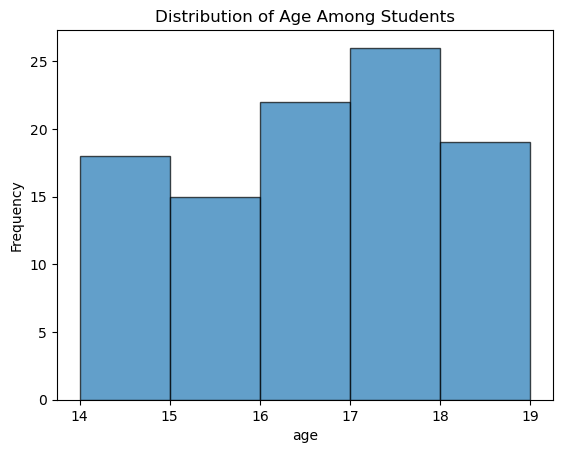

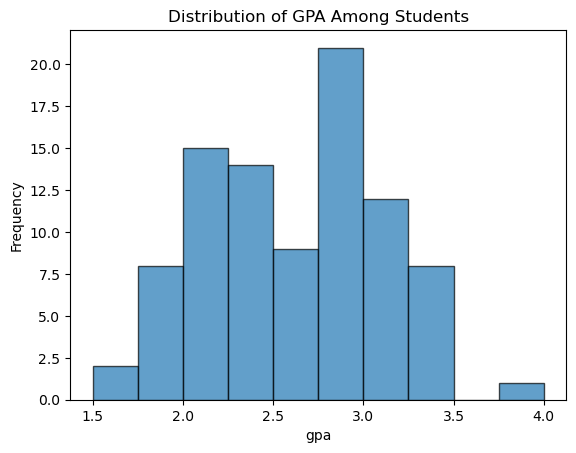

In [19]:
# Task D

import sys
sys.path.append('../')

import seaborn as sns
import matplotlib.pyplot as plt
from src.plot import plot_hist

plot_hist(df, "age", [14, 19], 5)
plt.title("Distribution of Age Among Students")

plot_hist(df, "gpa", [1.5, 4], 10)
plt.title("Distribution of GPA Among Students")


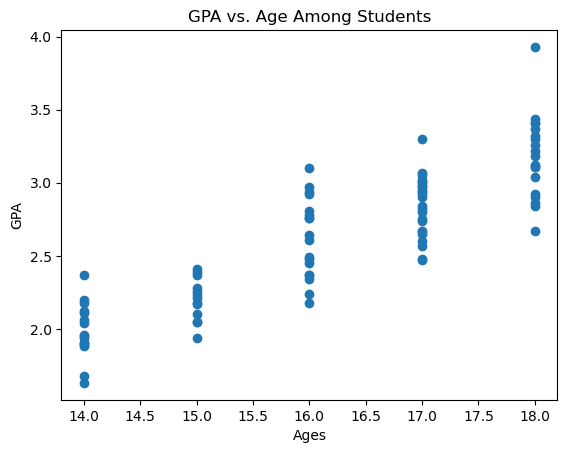

0.8786075344584666


In [20]:
# Task E

plt.scatter(df["age"], df["gpa"])
plt.xlabel("Ages")
plt.ylabel("GPA")
plt.title("GPA vs. Age Among Students")
plt.show()

print(df["age"].corr(df["gpa"], method = "pearson"))

There is a strong positive linear correlation between GPA and Age in the dataset. 

In [21]:
# Task F

import numpy as np

df["major"] = df["major"].str.lower()
df["major"] = df["major"].str.strip()
df["major"] = df["major"].replace(" ", np.nan)
df = df[df['major'].notna()]

In [22]:
# Task G

df_clean = pd.DataFrame(df)
df_clean.to_csv('../data/students_clean.csv', index = False)

Task H

The ages for the students are mostly uniformly distributed from 14 to 18. The GPA distribution for the students is roughly symmetric with a mean of around 2.60 and a standard deviation of around 0.5. There are a few students who do not have a major or GPA, which is likely because they are freshman. 

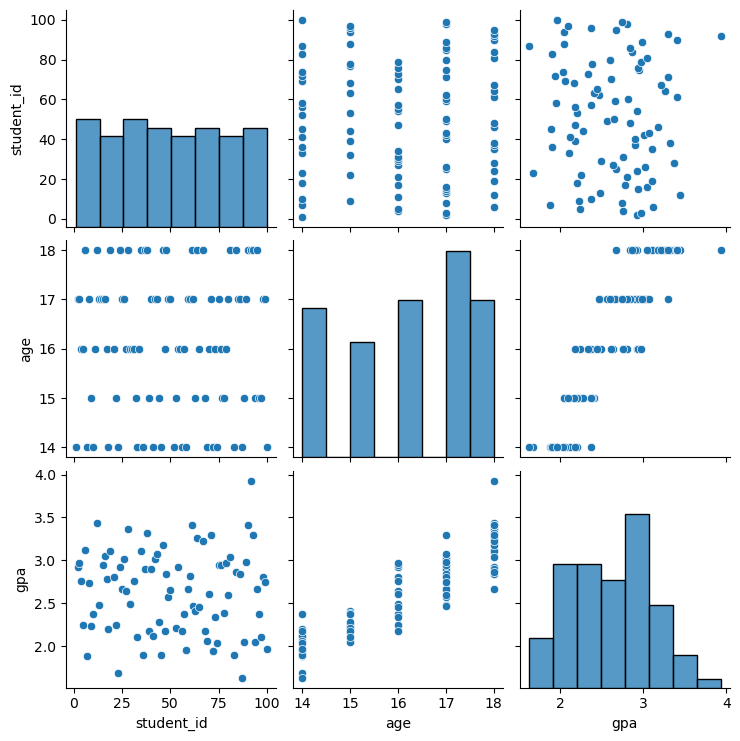

In [23]:
# Stretch Goal 3

sns.pairplot(df)